## Build a Random Forest classifier on any readily available disease dataset to predict the correct disease. 


### Compare the performance of the classifier with decision tree.


In [30]:
# import important packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [31]:
# Load dataset
data = pd.read_csv("C:\\Users\\neeth\\Downloads\\mlLab\\dataset\\B3-pima.csv")

In [32]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
114,7,160,54,32,175,30.5,0.588,39,1
394,4,158,78,0,0,32.9,0.803,31,1
473,7,136,90,0,0,29.9,0.210,50,0
502,6,0,68,41,0,39.0,0.727,41,1
37,9,102,76,37,0,32.9,0.665,46,1


In [33]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [34]:
# split data into input and taget variable(s)

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [35]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20)

In [36]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [39]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


In [40]:
# check Important features
feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": classifier.feature_importances_}).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
1,Glucose,0.239924
5,BMI,0.166317
7,Age,0.143321
6,DiabetesPedigreeFunction,0.131112
2,BloodPressure,0.090419
0,Pregnancies,0.086768
3,SkinThickness,0.075060
4,Insulin,0.067079


c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


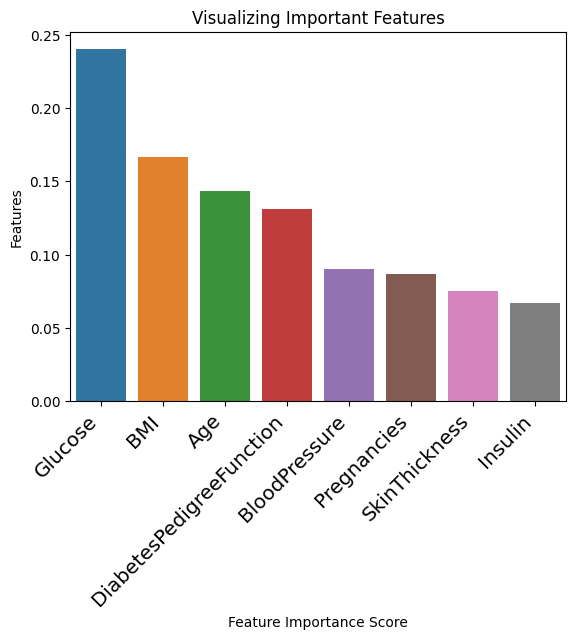

In [41]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()

In [42]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [44]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred=clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7207792207792207


### Array Method for different parameters on RandomForest Classifier

In [47]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

#### Grid Search CV

#### It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters 

#### so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

#### GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [50]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


exception calling callback for <Future at 0x1ac616e6dd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "c:\Python310\lib\site-packages\joblib\parallel.py", line 385, in __call__
  File "c:\Python310\lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    Return True if the task succeeded, False otherwise.
  File "c:\Python310\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    def effective_n_jobs(n_jobs=-1):
  File "c:\Python310\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    # This steps ensure that auto-baching works as expected.
  File "c:\Python310\lib\site-packages\joblib\_parallel_backends.py", line 556, in apply_async
  File "c:\Python310\lib\site-packages\joblib\externals\loky\reusable_executor.py", line 176, in submit
    is_reused = False
  File "c:\Python310\lib

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\neeth\AppData\Local\Temp\ipykernel_28024\20025057.py", line 1, in <module>
    grid_search.fit(X_train, y_train)
  File "c:\Python310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_search.py", line 1422, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_search.py", line 845, in evaluate_candidates
    out = parallel(
  File "c:\Python310\lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_con

In [51]:
grid_search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [52]:
rf_best = grid_search.best_estimator_
rf_best

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
rf_best.estimators_[5]

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                       random_state=1055847415)

In [ ]:
rf_best.estimators_[4]

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                       random_state=2048322751)

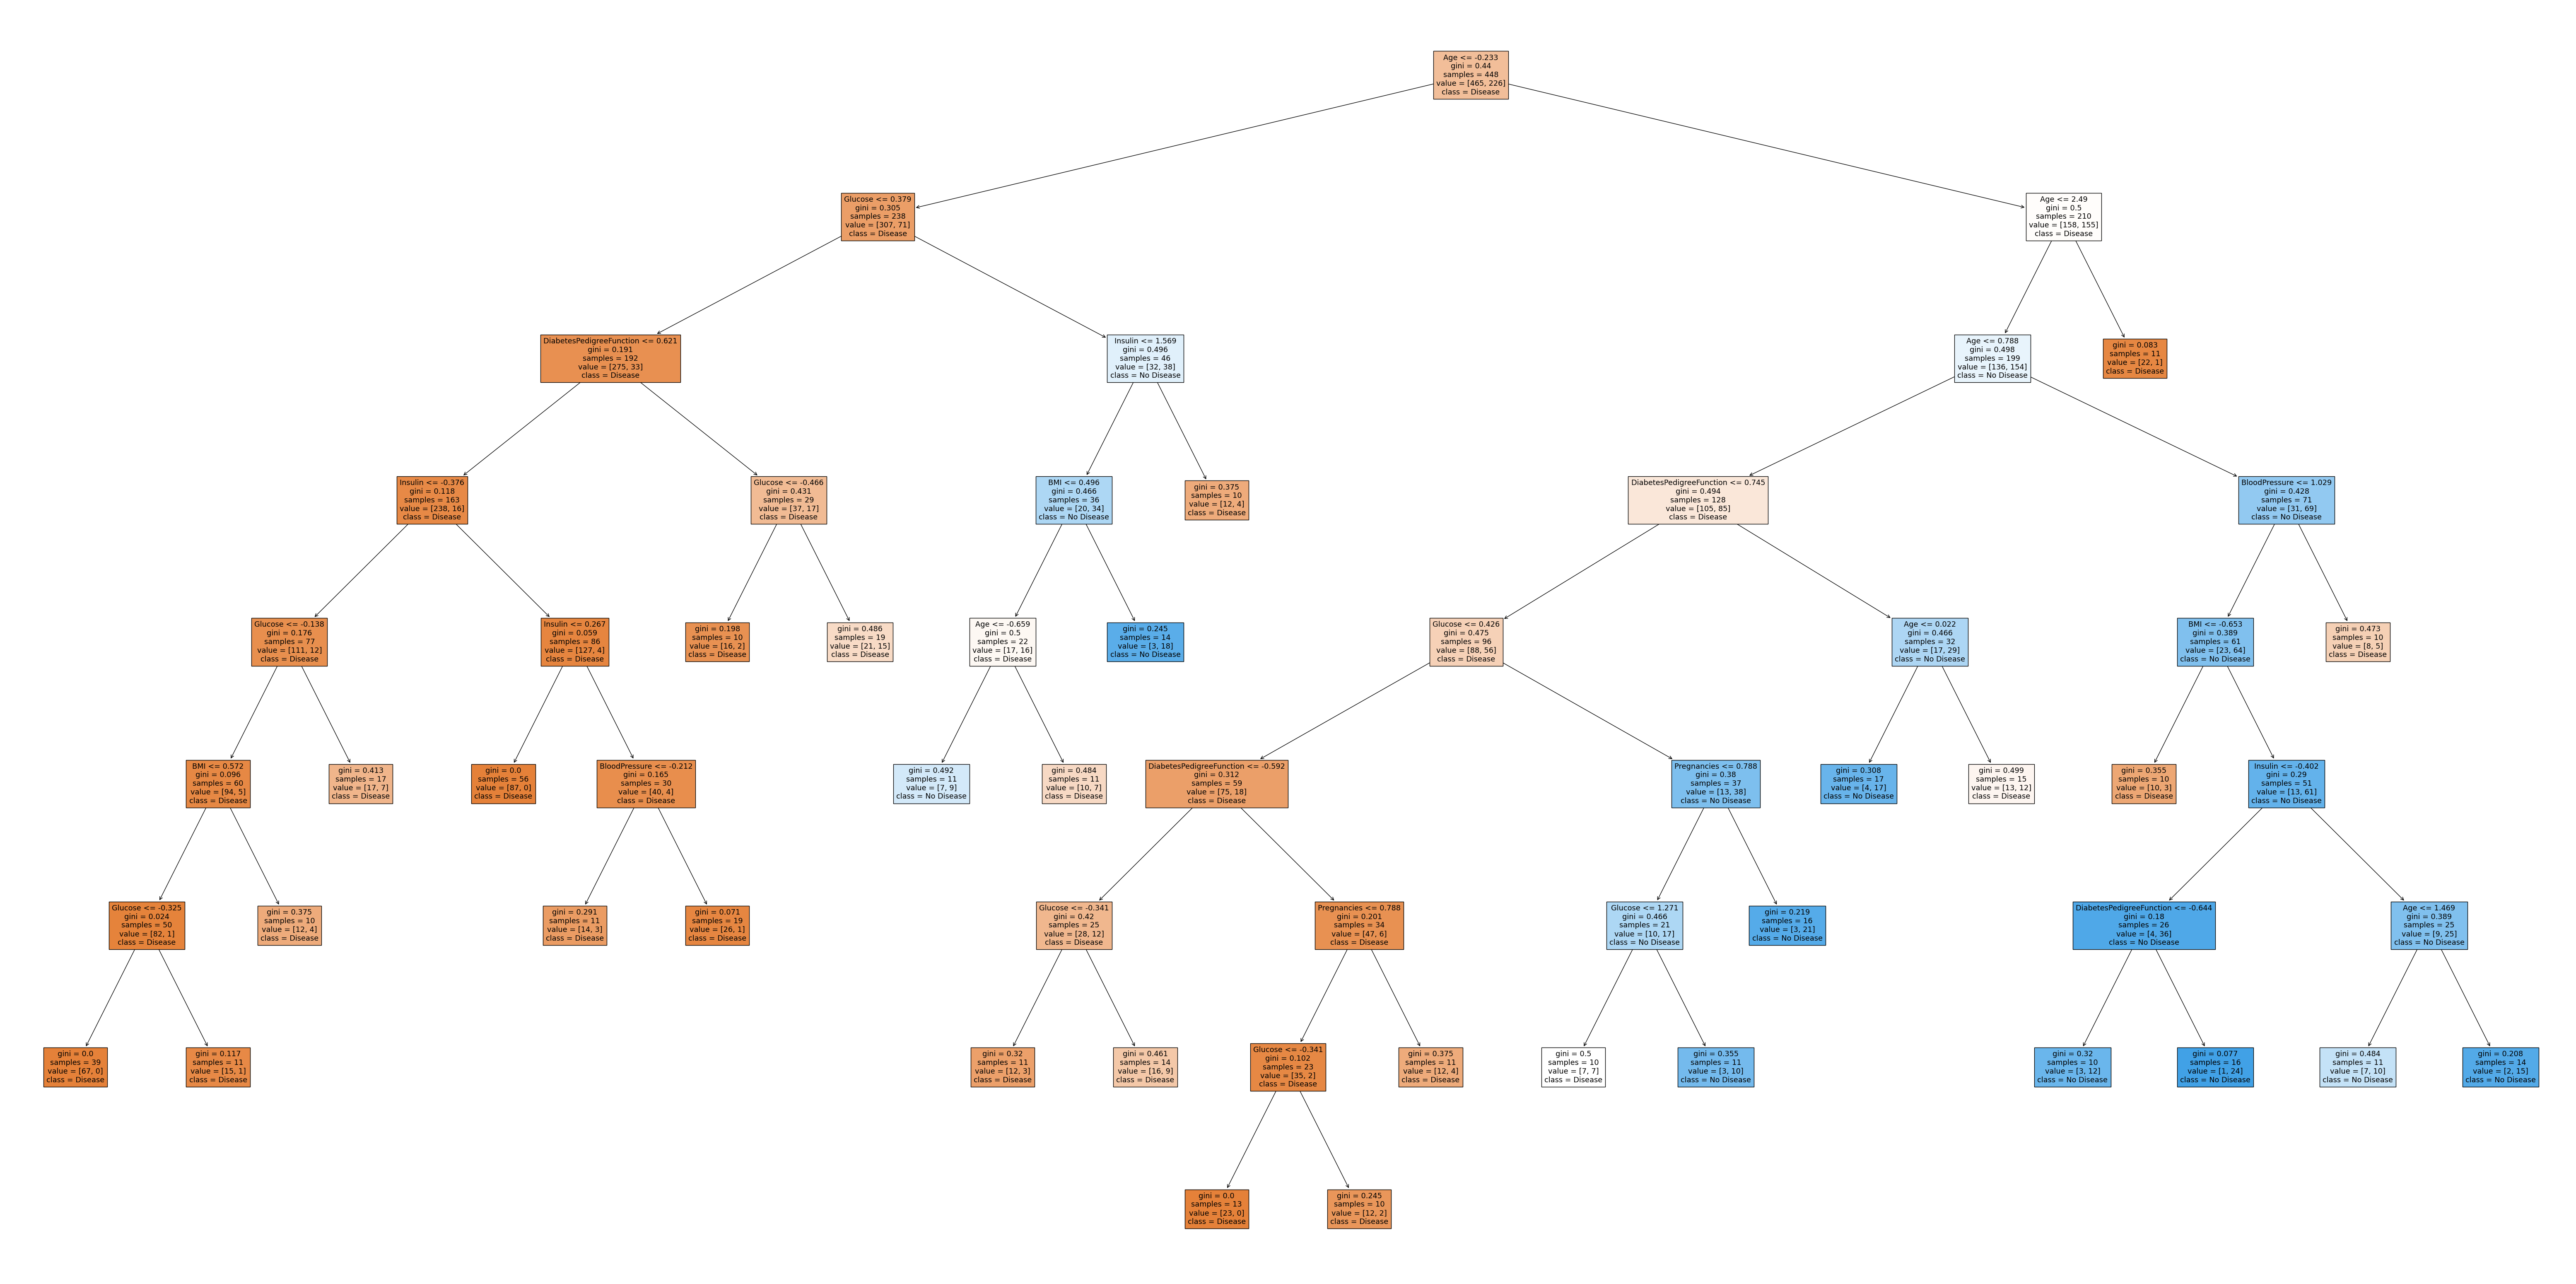

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);
plt.show()